In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 923 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=6c4f1d42bc51fc03fb422f8b4798699a63d2c7dc568fbe59fa845738837f2bab
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np
import pickle
import matplotlib.pyplot as plt
from google.colab import files
# from dtreeviz.trees import dtreeviz

In [2]:
import tensorflow as tf
tf.random.set_seed(221)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/Reforming-ML/Data/

/content/gdrive/MyDrive/Reforming-ML/Data


In [63]:
!ls

 CH4_Conversion_180922.csv
 CH4_Conversion_Predictions_Test_Parity_Plot.csv
 CH4_Conversion_Predictions_Train_Parity_Plot.csv
 CH4ConversionReforming.csv
 CH4_MF_Predictions_2.csv
 CH4_MF_Predictions.csv
 CH4_MF_Predictions_New.csv
 CH4MoleFractionReforming.csv
 CO2_Conversion_180922.csv
 CO2_Conversion_2.csv
 CO2_Conversion_Predictions_Test_Parity_Plot.csv
 CO2_Conversion_Predictions_Train_Parity_Plot.csv
 CO2ConversionReforming.csv
 CO2_MF_Predictions.csv
 CO2MoleFractionReforming.csv
 CO_MF_Predictions.csv
 COMoleFractionReforming.csv
'Feature Importance - CO MF'
'Feature Importance - CO MF.csv'
'Feature Importance - H2 MF'
'Feature Importance - H2 MF.csv'
 H2_MF_Predictions.csv
 H2MoleFractionReforming.csv


In [64]:
data_df = pd.read_csv('CH4_Conversion_180922.csv')

In [65]:
data_df

,Unnamed: 0,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,y_true
0,262,973.15,180000,16.20,5,6.915084,0.500000,0.00,0.152446
1,280,973.15,180000,16.20,5,4.185106,0.500000,0.00,0.213806
2,299,973.15,180000,16.20,5,3.192387,0.500000,0.00,0.244160
3,324,973.15,180000,16.20,5,1.488971,0.500000,0.00,0.363233
4,504,973.15,180000,16.20,5,2.944207,0.500000,0.00,0.259618
...,...,...,...,...,...,...,...,...,...
2463,2392,1173.15,5520000,18.34,108,7.361217,0.666667,3.06,0.865678
2464,2406,1173.15,5520000,18.34,108,0.056124,0.666667,3.06,0.992764
2465,2436,1173.15,5520000,18.34,108,3.391023,0.666667,3.06,0.868892
2466,2438,1173.15,5520000,18.34,108,11.730647,0.666667,3.06,0.865678


In [ ]:
data_df.drop('SAV', axis = 1, inplace = True)

In [ ]:
data_df

,Temp,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CO MF
0,973.15,5.7616,100,9.400000,0.672495,2.02,0.010886
1,1073.15,16.2000,10,7.232703,0.666667,0.00,0.075248
2,973.15,16.2000,10,4.564263,0.666667,0.00,0.089555
3,973.15,16.2000,10,3.434803,0.666667,0.00,0.109046
4,973.15,16.2000,10,0.867035,0.666667,0.00,0.190094
...,...,...,...,...,...,...,...
718,1073.15,5.7616,100,6.783333,0.672495,2.02,0.071500
719,973.15,5.7616,20,18.533333,0.672495,2.02,0.015072
720,1073.15,5.7616,50,7.516667,0.672495,2.02,0.081436
721,1073.15,5.7616,100,1.716667,0.672495,2.02,0.115647


In [ ]:
train_df, test_df = train_test_split(data_df, test_size = 0.2)

In [ ]:
train_df

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CO2 MF
142,973.15,180000,5.7616,100,6.016667,0.672495,2.02,0.093411
295,973.15,180000,5.7616,100,2.666667,0.672495,2.02,0.068956
8,973.15,180000,5.7616,20,3.183333,0.672495,2.02,0.053930
120,1073.15,150000,5.7616,20,20.516667,0.672495,2.02,0.080543
185,1073.15,150000,5.7616,100,2.983333,0.672495,2.02,0.049112
...,...,...,...,...,...,...,...,...
321,1073.15,150000,5.7616,50,1.900000,0.672495,2.02,0.047638
334,973.15,180000,5.7616,20,2.766667,0.672495,2.02,0.055846
280,1073.15,150000,5.7616,20,15.650000,0.672495,2.02,0.085379
16,973.15,180000,5.7616,20,13.300000,0.672495,2.02,0.083959


In [ ]:
r2_score(train_df['y_true'], train_df['y_pred'])

0.9811214934560353

In [ ]:
r2_score(test_df['y_true'], test_df['y_pred'])

0.9817930180765677

In [ ]:
r2_score(data_df['y_true'], data_df['y_pred'])

0.9813131223292856

In [ ]:
data_df.iloc[:,8]

0      0.087745
1      0.236600
2      0.241920
3      0.131305
4      0.370494
         ...   
563    0.064451
564    0.195293
565    0.061457
566    0.272249
567    0.260761
Name: y_true, Length: 568, dtype: float64

In [ ]:
data_df.dtypes

Temp       float64
SAV          int64
GHSV       float64
ppm          int64
Time       float64
CO2/CH4    float64
H2O/CH4    float64
CH4MF      float64
dtype: object

In [ ]:
data_800_50['CO2/CH4'].unique()

array([1.        , 0.67249496])

In [ ]:
data_700_50_one = data_700_50[data_700_50['CO2/CH4'] == 1]
data_700_100_one =  data_700_100[data_700_100['CO2/CH4'] == 1]

In [ ]:
data_800_50_one = data_800_50[data_800_50['CO2/CH4'] == 1]
data_800_100_one =  data_800_100[data_800_100['CO2/CH4'] == 1]

In [ ]:
data_700_50_other = data_700_50[data_700_50['CO2/CH4'] != 1]
data_700_100_other =  data_700_100[data_700_100['CO2/CH4'] == 1]

In [ ]:
data_800_50_other = data_800_50[data_800_50['CO2/CH4'] != 1]
data_800_100_other =  data_800_100[data_800_100['CO2/CH4'] != 1]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f695cd15190> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f695cc8e1d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


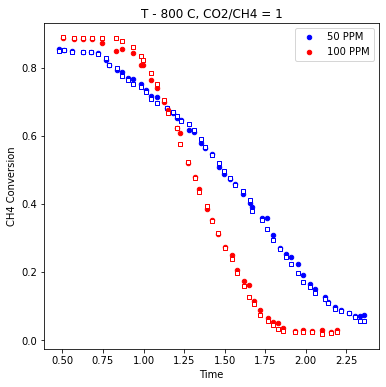

In [ ]:
ax = data_800_50_one.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
data_800_50_one.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
data_800_100_one.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
data_800_100_one.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['50 PPM', '100 PPM'])
plt.ylabel('CH4 Conversion')
plt.title('T - 800 C, CO2/CH4 = 1')
plt.savefig('CH4-Conversion(800,1).png', transparent = False)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f695cc14c10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f695cc14810> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


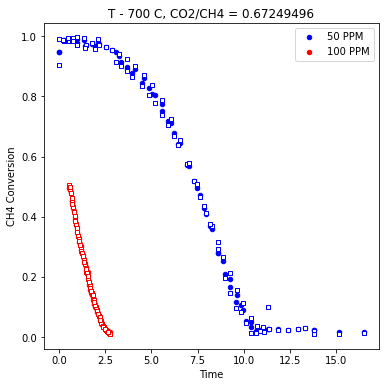

In [ ]:
ax = data_700_50_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
data_700_50_other.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
data_700_100_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
data_700_100_other.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['50 PPM', '100 PPM'])
plt.ylabel('CH4 Conversion')
plt.title('T - 700 C, CO2/CH4 = 0.67249496')
plt.savefig('CH4-Conversion(700,0.67249496).png', transparent = False)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f695cc5d2d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f695cb90850> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


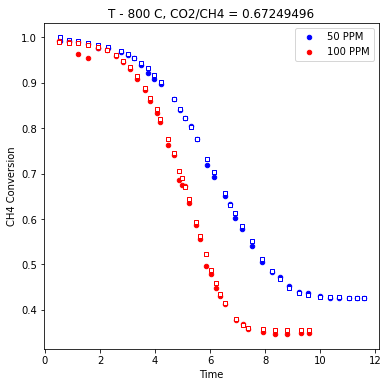

In [ ]:
ax = data_800_50_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue', figsize =(6,6))
data_800_50_other.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
data_800_100_other.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = ax)
data_800_100_other.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['50 PPM', '100 PPM'])
plt.ylabel('CH4 Conversion')
plt.title('T - 800 C, CO2/CH4 = 0.67249496')
plt.savefig('CH4-Conversion(800,0.67249496).png', transparent = False)

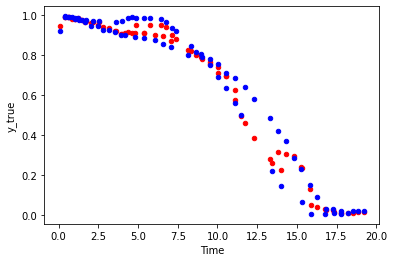

In [ ]:
ax = data_700_20.plot.scatter(x = 'Time', y = 'y_pred', color = 'red')
data_700_20.plot.scatter(x = 'Time', y = 'y_true', color = 'blue', ax =ax)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f695ca21a10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f695c8a7c10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


Text(0.5, 1.0, 'T - 700 C, CO2/CH4 = 1')

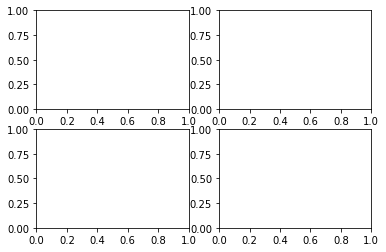

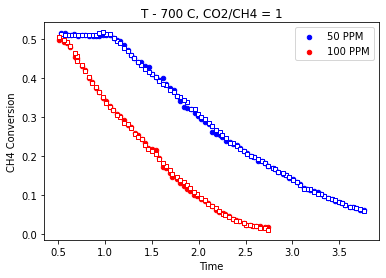

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0,0] = data_700_50_one.plot.scatter(x = 'Time', y = 'y_pred', color = 'blue')
data_700_50_one.plot.scatter(x = 'Time', y = 'y_true', marker = 's', color = 'white', edgecolor = 'blue', ax =axs[0, 0], label='_nolegend_')
data_700_100_one.plot.scatter(x = 'Time', y = 'y_pred', color = 'red', ax = axs[0,0])
data_700_100_one.plot.scatter(x = 'Time', y = 'y_true',marker = 's', color = 'white', edgecolor = 'red', ax =axs[0,0], label='_nolegend_')
plt.legend(['50 PPM', '100 PPM'])
plt.ylabel('CH4 Conversion')
plt.title('T - 700 C, CO2/CH4 = 1')
# plt.savefig('CH4-Conversion(700,1).png', transparent = False)

In [ ]:
data_700_5 = data_700[data_700['PPM'] == 5]
data_700_10 = data_700[data_700['PPM'] == 10]

In [ ]:
data_800_5 = data_800[data_800['PPM'] == 5]
data_800_10 = data_800[data_800['PPM'] == 10]

In [ ]:
data_700_5['CH4/CO2'] = 1/ data_700_5['CO2/CH4']
data_700_10['CH4/CO2'] = 1/ data_700_10['CO2/CH4']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_800_5['CH4/CO2'] = 1/ data_800_5['CO2/CH4']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_800_10['CH4/CO2'] = 1/ data_800_10['CO2/CH4']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_800_5

,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,y_true,y_pred
9,1073.15,150000.0,16.2,5.0,4.628610,0.666667,0.0,0.629934,0.628997
22,1073.15,150000.0,16.2,5.0,9.331359,0.666667,0.0,0.438442,0.443972
41,1073.15,150000.0,16.2,5.0,10.490973,0.500000,0.0,0.144635,0.143707
77,1073.15,150000.0,16.2,5.0,8.734017,0.500000,0.0,0.176049,0.174762
81,1073.15,150000.0,16.2,5.0,1.818819,0.500000,0.0,0.411540,0.409711
...,...,...,...,...,...,...,...,...,...
2272,1073.15,150000.0,16.2,5.0,0.208276,0.500000,0.0,0.868202,0.812733
2293,1073.15,150000.0,16.2,5.0,9.084132,0.666667,0.0,0.458972,0.451319
2322,1073.15,150000.0,16.2,5.0,2.832447,0.500000,0.0,0.373394,0.338065
2367,1073.15,150000.0,16.2,5.0,0.546152,0.500000,0.0,0.674312,0.706263


In [ ]:
data_800_5['CO2/CH4'].unique()

array([0.66666667, 0.5       ])

In [ ]:
data_800_5_onehalf = data_800_5[data_800_5['CH4/CO2'] != 2]
data_800_10_onehalf = data_800_10[data_800_10['CH4/CO2'] != 2]

In [ ]:
data_700_5_onehalf = data_700_5[data_700_5['CH4/CO2'] != 2]
data_700_10_onehalf = data_700_10[data_700_10['CH4/CO2'] != 2]

In [ ]:
data_700_5_half = data_700_5[data_700_5['CO2/CH4'] == 0.5]
data_700_5_half

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CH4Conversion,CH4 Conversion - Training
179,973.15,180000,16.2,5,5.674185,0.5,0.0,0.179194,0.181922
192,973.15,180000,16.2,5,5.177826,0.5,0.0,0.191439,0.191422
213,973.15,180000,16.2,5,2.195155,0.5,0.0,0.302851,0.302068
349,973.15,180000,16.2,5,7.366320,0.5,0.0,0.144855,0.156740
452,973.15,180000,16.2,5,3.440567,0.5,0.0,0.233762,0.231738
591,973.15,180000,16.2,5,4.433286,0.5,0.0,0.207161,0.207390
611,973.15,180000,16.2,5,3.688747,0.5,0.0,0.229061,0.226409
647,973.15,180000,16.2,5,0.387203,0.5,0.0,0.705330,0.718425
716,973.15,180000,16.2,5,4.185106,0.5,0.0,0.213806,0.213217
730,973.15,180000,16.2,5,6.170545,0.5,0.0,0.168483,0.171357


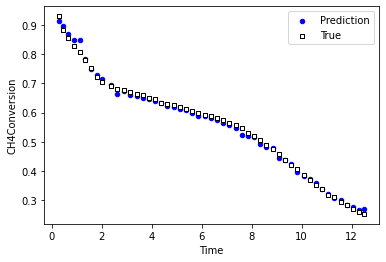

In [ ]:
ax = data_800_5_onehalf.plot.scatter(x = 'Time', y = 'CH4 Conversion - Training', color = 'blue')
data_800_5_onehalf.plot.scatter(x = 'Time', y = 'CH4Conversion', marker = 's', color = 'white', edgecolor = 'black', ax =ax)
plt.legend(['Prediction', 'True'])

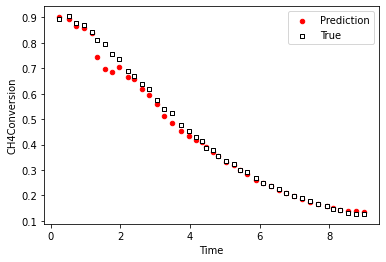

In [ ]:
ax = data_800_10_onehalf.plot.scatter(x = 'Time', y = 'CH4 Conversion - Training', color = 'red')
data_800_10_onehalf.plot.scatter(x = 'Time', y = 'CH4Conversion',marker = 's', color = 'white', edgecolor = 'black', ax =ax)
plt.legend(['Prediction', 'True'])

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f13c9945cd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f13c94aa250> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


Text(0, 0.5, 'CH4 Conversion')

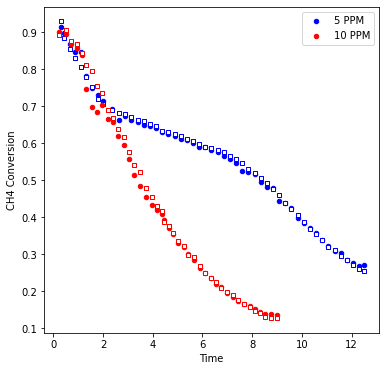

In [ ]:
ax = data_800_5_onehalf.plot.scatter(x = 'Time', y = 'CH4 Conversion - Training', color = 'blue', figsize =(6,6))
data_800_5_onehalf.plot.scatter(x = 'Time', y = 'CH4Conversion', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
data_800_10_onehalf.plot.scatter(x = 'Time', y = 'CH4 Conversion - Training', color = 'red', ax = ax)
data_800_10_onehalf.plot.scatter(x = 'Time', y = 'CH4Conversion',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel('CH4 Conversion')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f13c944c090> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f13c93d8290> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


Text(0, 0.5, 'CH4 Conversion')

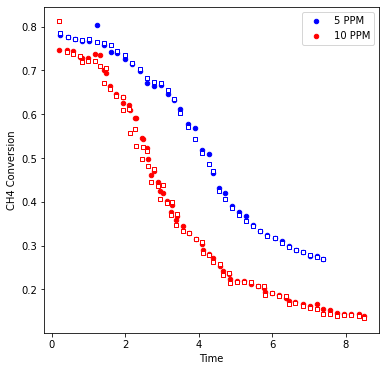

In [ ]:
ax = data_700_5_onehalf.plot.scatter(x = 'Time', y = 'CH4 Conversion - Training', color = 'blue', figsize =(6,6))
data_700_5_onehalf.plot.scatter(x = 'Time', y = 'CH4Conversion', marker = 's', color = 'white', edgecolor = 'blue', ax =ax, label='_nolegend_')
data_700_10_onehalf.plot.scatter(x = 'Time', y = 'CH4 Conversion - Training', color = 'red', ax = ax)
data_700_10_onehalf.plot.scatter(x = 'Time', y = 'CH4Conversion',marker = 's', color = 'white', edgecolor = 'red', ax =ax, label='_nolegend_')
plt.legend(['5 PPM', '10 PPM'])
plt.ylabel('CH4 Conversion')

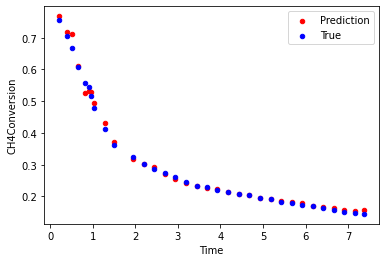

In [ ]:
ax = data_700_5_half.plot.scatter(x = 'Time', y = 'CH4 Conversion - Training', color = 'red')
data_700_5_half.plot.scatter(x = 'Time', y = 'CH4Conversion', color = 'blue', ax =ax)
plt.legend(['Prediction', 'True'])

In [ ]:
data_700_10_half = data_700_10[data_700_10['CO2/CH4'] == 0.5]
data_700_10_half

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CH4Conversion,CH4 Conversion - Training
135,973.15,180000,16.2,10,5.674185,0.5,0.0,0.141980,0.141860
227,973.15,180000,16.2,10,3.688747,0.5,0.0,0.189270,0.195155
314,973.15,180000,16.2,10,3.438687,0.5,0.0,0.203012,0.210227
326,973.15,180000,16.2,10,5.177826,0.5,0.0,0.150812,0.151718
331,973.15,180000,16.2,10,3.936927,0.5,0.0,0.177059,0.185920
333,973.15,180000,16.2,10,4.185106,0.5,0.0,0.168840,0.175667
382,973.15,180000,16.2,10,4.433286,0.5,0.0,0.165023,0.165935
431,973.15,180000,16.2,10,1.136040,0.5,0.0,0.464080,0.472904
582,973.15,180000,16.2,10,2.966769,0.5,0.0,0.235828,0.241107
705,973.15,180000,16.2,10,0.413055,0.5,0.0,0.685125,0.703081


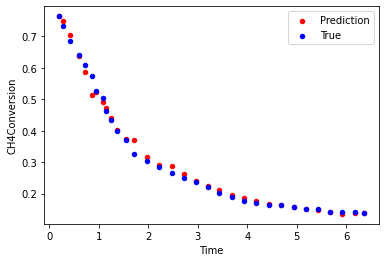

In [ ]:
ax = data_700_10_half.plot.scatter(x = 'Time', y = 'CH4 Conversion - Training', color = 'red')
data_700_10_half.plot.scatter(x = 'Time', y = 'CH4Conversion', color = 'blue', ax =ax)
plt.legend(['Prediction', 'True'])

In [ ]:
data_df = pd.read_csv('../annfilestrainingtesting/CO2_MF_Reforming_Predictions_Test.csv')

In [ ]:
data_df

,Unnamed: 0,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,y_true,y_pred
0,0,973.15,180000.0,5.7616,100.0,5.683333,0.672495,2.02,0.092001,0.090452
1,1,1073.15,150000.0,5.7616,100.0,2.300000,0.672495,2.02,0.050373,0.048697
2,2,973.15,180000.0,5.7616,100.0,5.683333,0.672495,2.02,0.093584,0.090452
3,3,1073.15,150000.0,5.7616,50.0,7.516667,0.672495,2.02,0.077254,0.069207
4,4,1073.15,150000.0,5.7616,100.0,4.633333,0.672495,2.02,0.058906,0.062793
...,...,...,...,...,...,...,...,...,...,...
79,79,1073.15,150000.0,5.7616,50.0,11.050000,0.672495,2.02,0.080390,0.077088
80,80,1073.15,150000.0,5.7616,50.0,1.133333,0.672495,2.02,0.051059,0.059142
81,81,1073.15,150000.0,5.7616,100.0,0.000000,0.672495,2.02,0.025197,0.037969
82,82,1073.15,150000.0,5.7616,50.0,9.133333,0.672495,2.02,0.077545,0.072012


In [ ]:
y_true = data_df.iloc[:,8]
y_pred = data_df.iloc[:,9]
r2_score(y_true, y_pred)

0.7725486299935074

In [66]:
dataset_1 = data_df.values

In [48]:
dataset_1

array([[1.07315000e+03, 1.50000000e+05, 1.62000000e+01, ...,
        6.66666667e-01, 0.00000000e+00, 3.27551000e-01],
       [9.73150000e+02, 1.80000000e+05, 5.76160000e+00, ...,
        6.72494956e-01, 2.02000000e+00, 3.21360000e-01],
       [1.07315000e+03, 1.50000000e+05, 1.62000000e+01, ...,
        5.00000000e-01, 0.00000000e+00, 1.95703000e-01],
       ...,
       [1.07315000e+03, 1.50000000e+05, 1.62000000e+01, ...,
        6.66666667e-01, 0.00000000e+00, 2.01936000e-01],
       [9.73150000e+02, 1.80000000e+05, 1.62000000e+01, ...,
        6.66666667e-01, 0.00000000e+00, 1.70880000e-01],
       [9.73150000e+02, 1.80000000e+05, 5.76160000e+00, ...,
        6.72494956e-01, 2.02000000e+00, 3.12417000e-01]])

In [67]:
X_data = dataset_1[:, 1:8]
Y_data = dataset_1[:, 8]

In [ ]:
X_data_df = data_df.iloc[:,:7]
Y_data_df = data_df.iloc[:,7]

IndexError: ignored

In [ ]:
X_data

array([[9.73150000e+02, 1.80000000e+05, 1.62000000e+01, ...,
        6.91508400e+00, 5.00000000e-01, 0.00000000e+00],
       [9.73150000e+02, 1.80000000e+05, 1.62000000e+01, ...,
        4.18510600e+00, 5.00000000e-01, 0.00000000e+00],
       [9.73150000e+02, 1.80000000e+05, 1.62000000e+01, ...,
        3.19238700e+00, 5.00000000e-01, 0.00000000e+00],
       ...,
       [1.17315000e+03, 5.52000000e+06, 1.83400000e+01, ...,
        3.39102300e+00, 6.66666667e-01, 3.06000000e+00],
       [1.17315000e+03, 5.52000000e+06, 1.83400000e+01, ...,
        1.17306470e+01, 6.66666667e-01, 3.06000000e+00],
       [1.17315000e+03, 5.52000000e+06, 1.83400000e+01, ...,
        1.03333170e+01, 6.66666667e-01, 3.06000000e+00]])

In [ ]:
X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(
     X_data_df, Y_data_df, test_size=0.2, random_state=42)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(
     X_data, Y_data, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[9.73150000e+02, 1.80000000e+05, 5.76160000e+00, ...,
        0.00000000e+00, 6.72494956e-01, 2.02000000e+00],
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, ...,
        1.88000000e+01, 6.72494956e-01, 2.02000000e+00],
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, ...,
        1.26666667e+00, 6.72494956e-01, 2.02000000e+00],
       ...,
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, ...,
        9.56666667e+00, 6.72494956e-01, 2.02000000e+00],
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, ...,
        4.00000000e+00, 6.72494956e-01, 2.02000000e+00],
       [9.73150000e+02, 1.80000000e+05, 5.76160000e+00, ...,
        5.78333333e+00, 6.72494956e-01, 2.02000000e+00]])

In [ ]:
X_test

array([[1.07315000e+03, 1.50000000e+05, 5.76160000e+00, 5.00000000e+01,
        1.90000000e+00, 6.72494956e-01, 2.02000000e+00],
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, 5.00000000e+01,
        2.66666667e-01, 6.72494956e-01, 2.02000000e+00],
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, 2.00000000e+01,
        9.10000000e+00, 6.72494956e-01, 2.02000000e+00],
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, 2.00000000e+01,
        2.66666667e-01, 6.72494956e-01, 2.02000000e+00],
       [9.73150000e+02, 1.80000000e+05, 5.76160000e+00, 2.00000000e+01,
        1.15000000e+01, 6.72494956e-01, 2.02000000e+00],
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, 2.00000000e+01,
        0.00000000e+00, 6.72494956e-01, 2.02000000e+00],
       [1.07315000e+03, 1.50000000e+05, 5.76160000e+00, 5.00000000e+01,
        0.00000000e+00, 6.72494956e-01, 2.02000000e+00],
       [9.73150000e+02, 1.80000000e+05, 5.76160000e+00, 2.00000000e+01,
        1.85333333e+01, 6

In [50]:
X_train = X_data[:569]
Y_train = Y_data[:569]

In [ ]:
X_train_df['H2 Mole Fraction True'] = Y_train_df

In [ ]:
X_train_df

,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,CO2 Conversion True
69,973.15,180000,16.2,5,1.966706,0.666667,0,0.867753
365,1073.15,150000,16.2,5,4.334021,0.666667,0,0.858157
510,1073.15,150000,24.0,100,1.022549,1.000000,0,0.825000
307,1073.15,150000,16.2,5,5.750992,0.500000,0,0.476020
278,1073.15,150000,16.2,5,0.652647,0.500000,0,0.904611
...,...,...,...,...,...,...,...,...
71,973.15,180000,16.2,5,3.893103,0.666667,0,0.656800
106,973.15,180000,16.2,10,7.790521,0.666667,0,0.210987
270,973.15,150000,24.0,100,2.095460,1.000000,0,0.122047
435,1073.15,150000,16.2,10,8.030734,0.666667,0,0.220971


In [ ]:
X_test_df['H2 Mole Fraction True'] = Y_test_df

In [51]:
X_test = X_data[569:]
Y_test = Y_data[569:]

In [69]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [70]:
mms_ = MinMaxScaler()
Y_train = mms_.fit_transform(Y_train.reshape(-1, 1))
Y_test = mms_.transform(Y_test.reshape(-1, 1))

In [ ]:
X_train

array([[0.        , 1.        , 0.        , ..., 0.14583233, 0.33333333,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.3406726 , 0.33333333,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.06812412, 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.15642933, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.64492809, 0.33333333,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.52085127, 0.33333333,
        0.        ]])

In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [72]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

In [73]:
importances

array([0.22652154, 0.01291376, 0.08170826, 0.15477223, 0.4068684 ,
       0.03075755, 0.08645826])

In [74]:
feature_names = ['Temp', 'SAV', 'GHSV', 'PPM', 'Time', 'CO2/CH4', 'H2O/CH4']

In [75]:
feature_imp_df = pd.DataFrame()

In [76]:
feature_imp_df['Input Feature'] = feature_names
feature_imp_df['Feature Importance'] = importances

In [77]:
feature_imp_df

,Input Feature,Feature Importance
0,Temp,0.226522
1,SAV,0.012914
2,GHSV,0.081708
3,PPM,0.154772
4,Time,0.406868
5,CO2/CH4,0.030758
6,H2O/CH4,0.086458


In [78]:
feature_imp_df.to_csv("Feature Importance - CH4 Conv.csv")

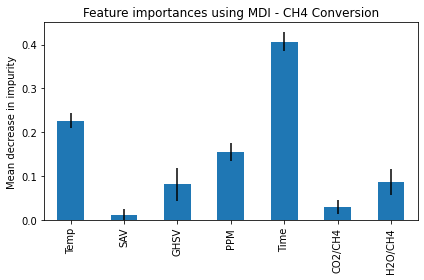

In [79]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI - CH4 Conversion")
ax.set_ylabel("Mean decrease in impurity")
# ax.set_yticks(np.arange(0,0.9,0.1))
fig.tight_layout()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = { 
    'n_estimators': [50, 100, 250, 500, 750, 1000],
    'max_depth' : list(range(1, 10)),
    'min_samples_leaf' : list(range(1,10)),
    'max_features' : ['auto', 'sqrt'],
    'bootstrap' : [True, False],
    'min_samples_split': list(range(2,10))
}

# oil_grid = RandomForestRegressor()

model_cv = RandomizedSearchCV(estimator = model, param_distributions= param_grid, random_state = 30, n_iter = 500)
# model_cv = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, verbose = 2, cv = 3)

In [ ]:
model_cv.fit(X_train, Y_train.reshape(len(Y_train),))

Fitting 3 folds for each of 15552 candidates, totalling 46656 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 100, 250, 500, 750, 1000]},
             verbose=2)

In [ ]:
y_pred_test = model.predict(X_test)
error = mean_squared_error(Y_test, y_pred_test)
print('MSE: %.3f' % error)
R2_score = r2_score(Y_test, y_pred_test)
print('R^2 Score: %.3f' % R2_score)

MSE: 0.003
R^2 Score: 0.956


In [ ]:
pickle.dump(model_cv, open('../co2_rf_grid_search.sav', 'wb'))

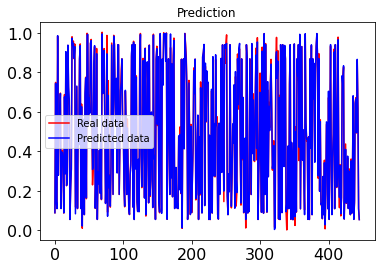

Text(0, 0.5, 'Predicted Values')

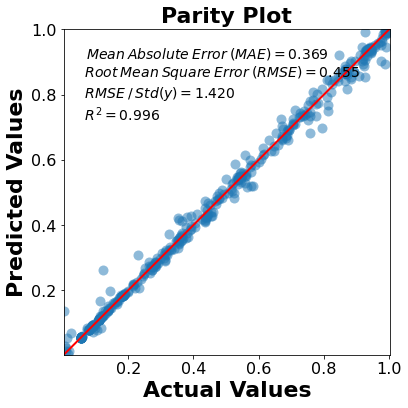

In [ ]:
import matplotlib.pyplot as plt
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

plt.plot(Y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_test, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

fignow = plt.figure(figsize=(6,6))
x = Y_test
y = y_pred_test
bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))
ax = plt.gca()
ax.set_xlim(bounds)
ax.set_ylim(bounds)
ax.set_aspect("equal", adjustable="box")
plt.plot(x,y,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)
ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

mean_abs_err = np.mean(np.abs(x-y))
rmse = np.sqrt(np.mean((x-y)**2))
rmse_std = rmse / np.std(y)
#z = np.polyfit(x,y, 1)
#y_hat = np.poly1d(z)(x)

text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(x,y):0.3f}$"

plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.title("Parity Plot", fontdict=font_axis_publish)
plt.xlabel('Actual Values', fontdict=font_axis_publish)
plt.ylabel('Predicted Values', fontdict=font_axis_publish)

In [ ]:
pickle.dump(model, open('./random_forest_ch4_conv_new.sav', 'wb'))
files.download('random_forest_ch4_conv_new.sav')

NameError: ignored

In [ ]:
#Entire Dataset
# model = pickle.load(open('../Model-Weights/random_forest_ch4_mf_new.sav', 'rb'))
X_all = np.concatenate((X_train, X_test))
Y_all = np.concatenate((Y_train, Y_test))
y_pred_test = model.predict(X_all)
error = sqrt(mean_squared_error(Y_all, y_pred_test))
print('RMSE: %.3f' % error)
R2_score = r2_score(Y_all, y_pred_test)
print('R^2 Score: %.3f' % R2_score)

RMSE: 0.032
R^2 Score: 0.985


In [ ]:
final_df = pd.DataFrame()
X_all = mms.inverse_transform(X_all)
final_df['Temp'] = X_all[:, 0]
final_df['SAV'] = X_all[:, 1]
final_df['GHSV'] = X_all[:, 2]
final_df['PPM'] = X_all[:, 3]
final_df['Time'] = X_all[:, 4]
final_df['CO2/CH4'] = X_all[:, 5]
final_df['H2O/CH4'] = X_all[:, 6]
final_df['y_true'] = mms_.inverse_transform(Y_all.reshape(-1,1))
final_df['y_pred'] = mms_.inverse_transform(y_pred_test.reshape(-1,1))
# y_pred_test = mms_.inverse_transform(y_pred_test)
# final_df['y_pred'] = mms_.inverse_transform(y_pred_test.reshape(-1,1))

IndexError: ignored

In [ ]:
final_df

,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,y_true,y_pred
0,973.15,180000.0,16.2,5.0,1.966706,0.666667,0.0,0.867753,0.849044
1,1073.15,150000.0,16.2,5.0,4.334021,0.666667,0.0,0.858157,0.855792
2,1073.15,150000.0,24.0,100.0,1.022549,1.000000,0.0,0.825000,0.806726
3,1073.15,150000.0,16.2,5.0,5.750992,0.500000,0.0,0.476020,0.464910
4,1073.15,150000.0,16.2,5.0,0.652647,0.500000,0.0,0.904611,0.919810
...,...,...,...,...,...,...,...,...,...
522,1073.15,150000.0,16.2,5.0,3.618759,0.500000,0.0,0.628472,0.557101
523,1073.15,150000.0,16.2,5.0,1.451215,0.500000,0.0,0.758368,0.742136
524,973.15,150000.0,24.0,50.0,2.226760,1.000000,0.0,0.379921,0.377914
525,973.15,150000.0,24.0,50.0,2.066317,1.000000,0.0,0.421260,0.413819


In [ ]:
final_df.to_csv('CO2_Conversion_2.csv')

In [ ]:
data_df['y_pred'] = mms_.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
data_df

,Unnamed: 0,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,y_true,y_pred
0,6,973.15,180000,16.2,5,4.542295,0.5,0,0.372964,0.849044
1,58,973.15,180000,16.2,5,0.212560,0.5,0,0.892683,0.855792
2,65,973.15,180000,16.2,5,7.143209,0.5,0,0.272512,0.806726
3,68,973.15,180000,16.2,5,7.371254,0.5,0,0.258787,0.464910
4,71,973.15,180000,16.2,5,6.036743,0.5,0,0.301303,0.919810
...,...,...,...,...,...,...,...,...,...,...
522,385,1073.15,150000,24.0,100,1.846078,1.0,0,0.095455,0.557101
523,412,1073.15,150000,24.0,100,1.214706,1.0,0,0.690909,0.742136
524,485,1073.15,150000,24.0,100,0.494118,1.0,0,0.868182,0.377914
525,501,1073.15,150000,24.0,100,1.564706,1.0,0,0.279545,0.413819


In [ ]:
data_df.to_csv('CO2_MF_Predictions_2.csv')

In [ ]:
final_df

,Temp,SAV,GHSV,PPM,Time,CO2/CH4,H2O/CH4,y_true,y_pred
0,1.0,0.0,0.0,1.000,0.3256,0.0,0.0,0.089275,0.084587
1,0.0,1.0,0.0,1.000,0.0064,0.0,0.0,0.001226,0.001382
2,1.0,0.0,0.0,1.000,0.2472,0.0,0.0,0.034455,0.033311
3,1.0,0.0,0.0,0.375,0.2768,0.0,0.0,0.031460,0.030335
4,0.0,1.0,0.0,0.000,0.2584,0.0,0.0,0.001313,0.003680
...,...,...,...,...,...,...,...,...,...
413,1.0,0.0,0.0,0.000,0.1232,0.0,0.0,0.000905,0.001338
414,0.0,1.0,0.0,1.000,0.0752,0.0,0.0,0.001317,0.002897
415,0.0,1.0,0.0,1.000,0.0376,0.0,0.0,0.000415,0.001359
416,0.0,1.0,0.0,1.000,0.2584,0.0,0.0,0.050914,0.042626


In [ ]:
data_df = final_df

In [ ]:
final_df.to_csv('.csv')

In [ ]:
dt = model_ch4_mf.estimators_[1]

In [ ]:
viz = dtreeviz(dt, X_train, Y_train,
               target_name="CH4MF",
               title="1st decision tree")

In [ ]:
#Training RMSE and R2
# model_ch4_mf = pickle.load(open('./random_forest_co2_conversion.sav', 'rb'))
y_pred_test = model.predict(X_train)
error = sqrt(mean_squared_error(Y_train, y_pred_test))
print('RMSE: %.3f' % error)
R2_score = r2_score(Y_train, y_pred_test)
print('R^2 Score: %.3f' % R2_score)
# X_train_df['CH4 Mole Fraction Train Predictions'] = mms_.inverse_transform(y_pred_test.reshape(-1,1))
# train_pred = mms_.inverse_transform(y_pred_test.reshape(-1, 1))
# train_df = pd.DataFrame(train_pred, columns = ['CO2 Mole Fraction - Training'])
# train_df.to_csv('CO2_Mole_Fraction_Training_Predictions.csv')
# X_train_df.to_csv('../Predictions-RF/CH4_MF_Final_Training_Predictions.csv')

RMSE: 0.021
R^2 Score: 0.993


In [ ]:
#Testing RMSE and R2
y_pred_test = model.predict(X_test)
error = sqrt(mean_squared_error(Y_test, y_pred_test))
print('RMSE: %.3f' % error)
R2_score = r2_score(Y_test, y_pred_test)
print('R^2 Score: %.3f' % R2_score)
# X_test_df['CH4 Mole Fraction Test Predictions'] = mms_.inverse_transform(y_pred_test.reshape(-1,1))
# X_test_df.to_csv('../Predictions-RF/CH4_MF_Final_Testing_Predictions.csv')
# test_pred = mms_.inverse_transform(y_pred_test.reshape(-1, 1))
# test_df = pd.DataFrame(test_pred, columns = ['CO2 Mole Fraction - Testing'])
# test_df.to_csv('CO2_Mole_Fraction_Testing_Predictions.csv')

RMSE: 0.057
R^2 Score: 0.956


In [ ]:
data_df_2 = pd.read_csv('CO2ConversionReforming.csv')
data_df_2 = data_df_2.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis = 1)

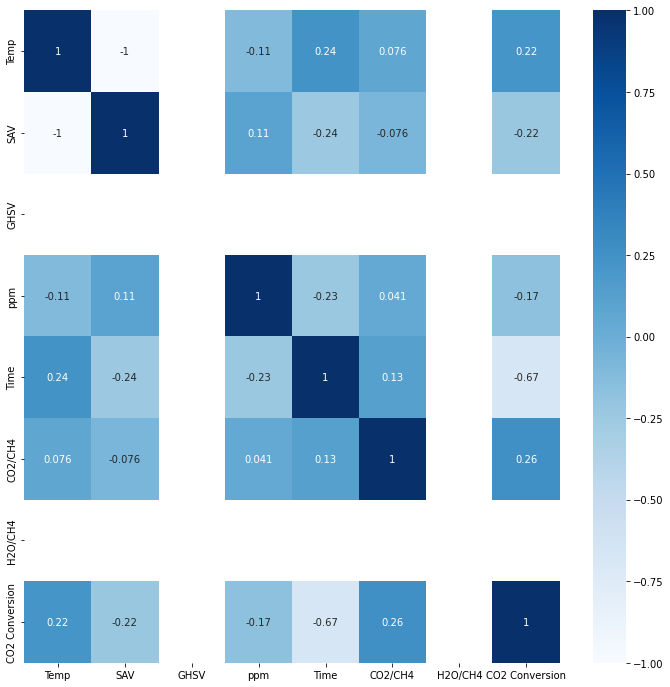

In [ ]:
corr_dataset = data_df_2.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_dataset, cmap = 'Blues', annot = True)

In [ ]:
data_df_3 = pd.read_csv('CH4MoleFractionReforming.csv')

In [ ]:
data_df_3

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CH4MF
0,1073.15,150000,5.7616,100,6.783333,0.672495,2.02,0.089275
1,973.15,180000,5.7616,100,0.133333,0.672495,2.02,0.001226
2,1073.15,150000,5.7616,100,5.150000,0.672495,2.02,0.034455
3,1073.15,150000,5.7616,50,5.766667,0.672495,2.02,0.031460
4,973.15,180000,5.7616,20,5.383333,0.672495,2.02,0.001313
...,...,...,...,...,...,...,...,...
413,1073.15,150000,5.7616,20,2.566667,0.672495,2.02,0.000905
414,973.15,180000,5.7616,100,1.566667,0.672495,2.02,0.001317
415,973.15,180000,5.7616,100,0.783333,0.672495,2.02,0.000415
416,973.15,180000,5.7616,100,5.383333,0.672495,2.02,0.050914


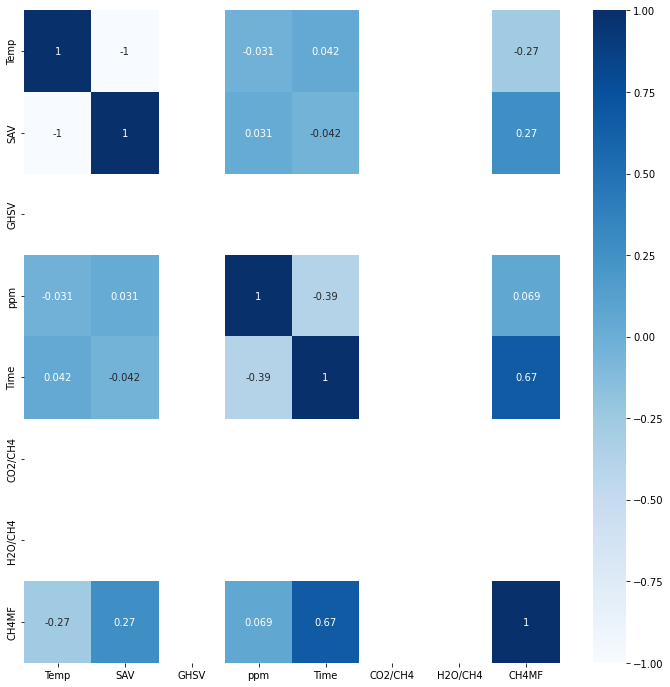

In [ ]:
corr_dataset = data_df_3.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_dataset, cmap = 'Blues', annot = True)

In [ ]:
data_df_4 = pd.read_csv('CO2MoleFractionReforming.csv')

In [ ]:
data_df_4

,Temp,SAV,GHSV,ppm,Time,CO2/CH4,H2O/CH4,CO2 MF
0,973.15,180000,5.7616,50,0.183333,0.672495,2.02,0.069461
1,1073.15,150000,5.7616,100,5.150000,0.672495,2.02,0.062884
2,1073.15,150000,5.7616,50,6.083333,0.672495,2.02,0.073789
3,973.15,180000,5.7616,50,3.250000,0.672495,2.02,0.071900
4,973.15,180000,5.7616,50,0.000000,0.672495,2.02,0.080231
...,...,...,...,...,...,...,...,...
413,1073.15,150000,5.7616,20,14.150000,0.672495,2.02,0.081264
414,973.15,180000,5.7616,20,9.000000,0.672495,2.02,0.083237
415,1073.15,150000,5.7616,20,11.850000,0.672495,2.02,0.078586
416,973.15,180000,5.7616,50,1.316667,0.672495,2.02,0.081183


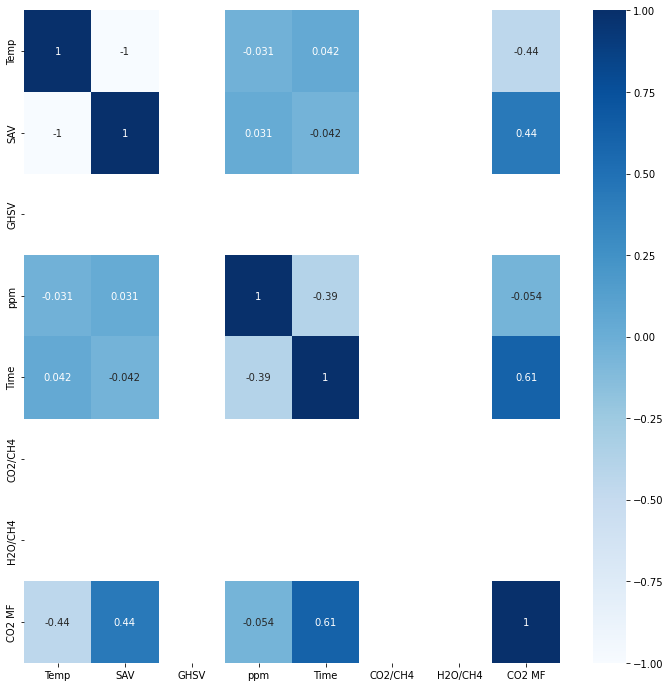

In [ ]:
corr_dataset = data_df_4.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_dataset, cmap = 'Blues', annot = True)

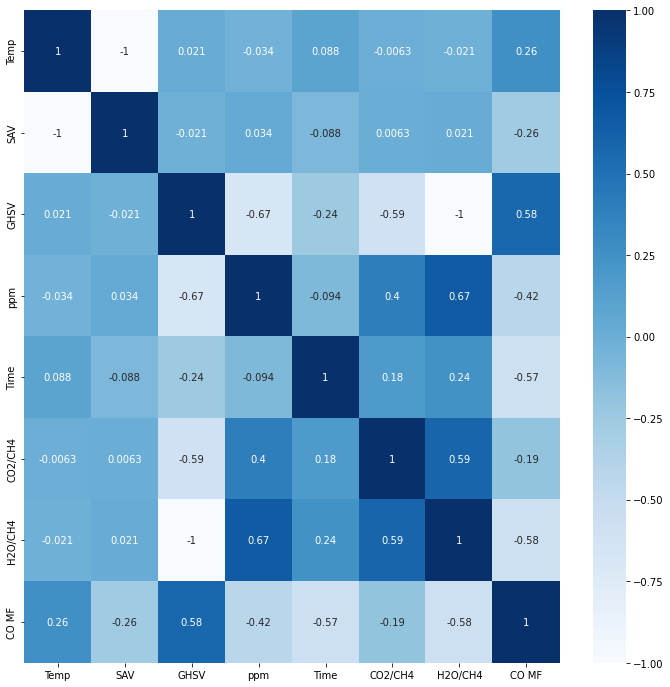

In [ ]:
data_df_5 = pd.read_csv('COMoleFractionReforming.csv')
corr_dataset = data_df_5.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_dataset, cmap = 'Blues', annot = True)

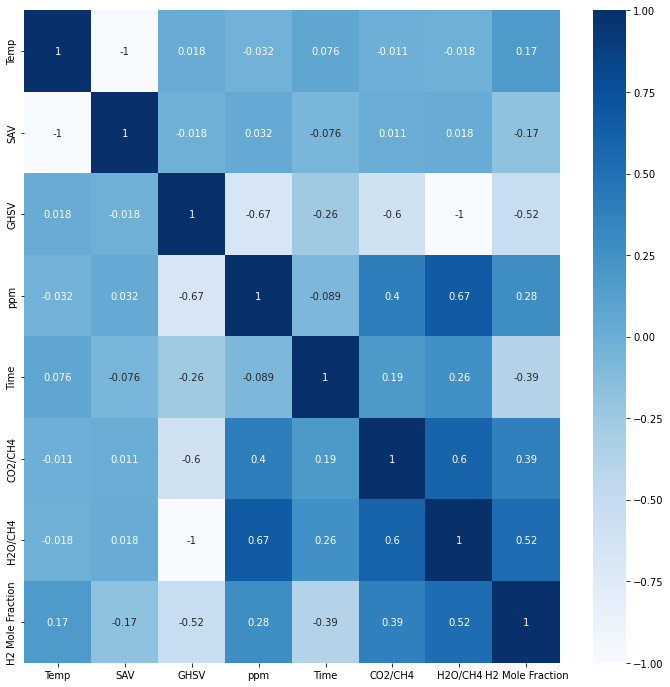

In [ ]:
data_df_6 = pd.read_csv('H2MoleFractionReforming.csv')
corr_dataset = data_df_6.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_dataset, cmap = 'Blues', annot = True)